<a href="https://colab.research.google.com/github/Adharshmahesh/Classification-of-images-MNIST-dataset-Fast-ai/blob/main/MNIST_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate


In [2]:
path = untar_data(URLs.MNIST)
path

PosixPath('/root/.fastai/data/mnist_png')

In [3]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/training'),
 PosixPath('/root/.fastai/data/mnist_png/testing')]

In [4]:
image_l = ImageList.from_folder(path, convert_mode='L')

In [5]:
image_l.items[5]

PosixPath('/root/.fastai/data/mnist_png/training/3/59808.png')

In [6]:
image_l

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png

In [7]:
dataset = image_l.split_by_folder(train='training', valid='testing')
#dataset = dataset.valid
dataset

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png;

Test: None

In [8]:
defaults.cmap='binary'

In [9]:
label_list = dataset.label_from_folder()
label_list

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_png;

Test: None

In [10]:
x,y = label_list.train[0]

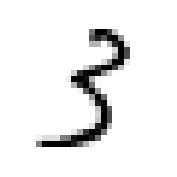

In [11]:
x.show()

In [12]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])
label_list = label_list.transform(tfms)

In [13]:
bs = 128
data = label_list.databunch(bs=bs).normalize()

In [14]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

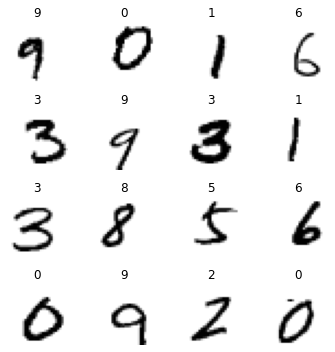

In [15]:
data.show_batch(rows=4, figsize=(5,5))

In [16]:
def conv_and_res(ni,nf): return nn.Sequential(conv2(ni, nf), res_block(nf))

In [17]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [18]:
model = nn.Sequential(
    conv_and_res(1, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, 10),
    Flatten()
)

In [19]:
model = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


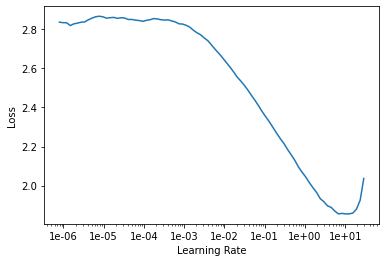

In [20]:
model.lr_find(end_lr=100)
model.recorder.plot()

In [21]:
model.fit_one_cycle(12, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.710096,1.213474,0.634400,00:58
1,0.563655,0.370090,0.944000,00:57
2,0.254442,0.193957,0.969000,00:57
3,0.151038,0.102050,0.977900,00:58
4,0.101051,0.063975,0.986500,00:58
5,0.079590,0.073595,0.982300,00:58
6,0.072962,0.042905,0.988700,00:58
7,0.057662,0.034562,0.990400,00:58
8,0.049763,0.031111,0.991500,00:59
9,0.050321,0.030017,0.992800,00:59


In [22]:
model.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          72         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
___________________________________________________

In [23]:
model.save('stage-1')

In [24]:
u,v = label_list.valid[0]
#model.validate(dataset)

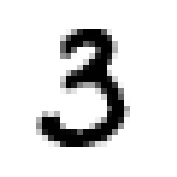

In [25]:
u.show()

In [26]:
dataset_valid = dataset.valid.split_none()
#model.validate(data.valid_dl)

In [27]:
label_list_valid = dataset_valid.label_from_folder()
label_list_valid

LabelLists;

Train: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /root/.fastai/data/mnist_png;

Test: None

In [28]:
data_val = label_list_valid.databunch(bs=bs).normalize()

In [29]:
model.validate(data_val.train_dl)

[0.02877459, tensor(0.9921)]